In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [250]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
tb = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-2/Week_6_Module_2_Project/data/TB_burden_age_sex_2020-11-16_clean.csv')
tb.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2019,inc,num,0-14,a,all,15000,7900.0,22000.0
1,Afghanistan,AF,AFG,4,2019,inc,num,0-14,f,all,7300,2400.0,12000.0
2,Afghanistan,AF,AFG,4,2019,inc,num,0-14,m,all,7800,2600.0,13000.0
3,Afghanistan,AF,AFG,4,2019,inc,num,0-4,f,all,2900,0.0,7200.0
4,Afghanistan,AF,AFG,4,2019,inc,num,0-4,m,all,3400,0.0,8500.0


In [3]:
import sqlite3
from pandas import DataFrame

conn = sqlite3.connect('TestDB2.db')
c = conn.cursor()

# c.execute('CREATE TABLE tb_data (country text, iso2 text, iso3 text, iso_numeric number, year number, measure text, unit text, age_group text, sex text, risk_factor text, best number, lo number, hi number)')
# conn.commit()

tb.to_sql('tb_data', conn, if_exists='replace', index = False)
 
c.execute('''  
SELECT * FROM tb_data
          ''')

df = DataFrame(c.fetchall(), columns=['country','iso2', 'iso3', 'iso_numeric', 'year', 'measure', 'unit', 'age_group', 'sex', 'risk_factor', 'best', 'lo', 'hi'])    
df.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2019,inc,num,0-14,a,all,15000,7900.0,22000.0
1,Afghanistan,AF,AFG,4,2019,inc,num,0-14,f,all,7300,2400.0,12000.0
2,Afghanistan,AF,AFG,4,2019,inc,num,0-14,m,all,7800,2600.0,13000.0
3,Afghanistan,AF,AFG,4,2019,inc,num,0-4,f,all,2900,0.0,7200.0
4,Afghanistan,AF,AFG,4,2019,inc,num,0-4,m,all,3400,0.0,8500.0


In [4]:
global_impact_of_tb = pd.DataFrame()
global_impact_of_tb['Year'] = ['2016','2017', '2018', '2019', '2020']
global_impact_of_tb['South-East Asia'] = [46.0, 45.0, 44.0, 44.0, 44.0]
global_impact_of_tb['Africa'] = [26.0, 25.0, 25.0, 24.0, 25.0]
global_impact_of_tb['Western'] = [15.0, 17.0, 18.0, 18.0, 18.0]
global_impact_of_tb['Eastern Mediterranean'] = [7.0, 7.0, 7.7, 8.0, 8.2]
global_impact_of_tb['Americas'] = [3.0, 3.0, 2.8, 3.0, 2.9]
global_impact_of_tb['Europe'] = [3.0, 3.0, 2.7, 3.0, 2.5]
global_impact_of_tb = global_impact_of_tb.set_index('Year')
global_impact_of_tb

,South-East Asia,Africa,Western,Eastern Mediterranean,Americas,Europe
Year,,,,,,
2016,46.0,26.0,15.0,7.0,3.0,3.0
2017,45.0,25.0,17.0,7.0,3.0,3.0
2018,44.0,25.0,18.0,7.7,2.8,2.7
2019,44.0,24.0,18.0,8.0,3.0,3.0
2020,44.0,25.0,18.0,8.2,2.9,2.5


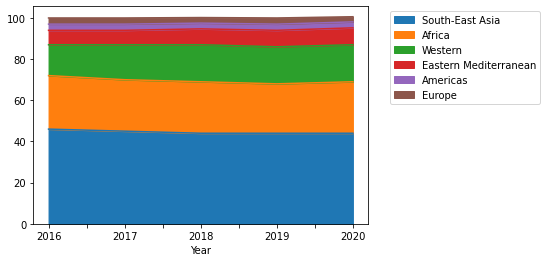

In [5]:
import matplotlib.pyplot as plot
ax = global_impact_of_tb.plot.area(stacked=True);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plot.show(block=True);

In [6]:
Afghanistan = df.loc[df['country'] == 'Afghanistan']
Afghanistan.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2019,inc,num,0-14,a,all,15000,7900.0,22000.0
1,Afghanistan,AF,AFG,4,2019,inc,num,0-14,f,all,7300,2400.0,12000.0
2,Afghanistan,AF,AFG,4,2019,inc,num,0-14,m,all,7800,2600.0,13000.0
3,Afghanistan,AF,AFG,4,2019,inc,num,0-4,f,all,2900,0.0,7200.0
4,Afghanistan,AF,AFG,4,2019,inc,num,0-4,m,all,3400,0.0,8500.0


In [7]:
Albania = df.loc[df['country'] == 'Albania']
Albania.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
33,Albania,AL,ALB,8,2019,inc,num,0-14,a,all,13,11.0,15.0
34,Albania,AL,ALB,8,2019,inc,num,0-14,f,all,5,4.0,6.0
35,Albania,AL,ALB,8,2019,inc,num,0-14,m,all,8,6.0,10.0
36,Albania,AL,ALB,8,2019,inc,num,0-4,f,all,0,0.0,0.0
37,Albania,AL,ALB,8,2019,inc,num,0-4,m,all,5,2.0,7.0


In [8]:
Algeria = df.loc[df['country'] == 'Algeria']
Algeria.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
69,Algeria,DZ,DZA,12,2019,inc,num,0-14,a,all,2000,1500.0,2500.0
70,Algeria,DZ,DZA,12,2019,inc,num,0-14,f,all,940,590.0,1300.0
71,Algeria,DZ,DZA,12,2019,inc,num,0-14,m,all,1100,660.0,1400.0
72,Algeria,DZ,DZA,12,2019,inc,num,0-4,f,all,510,71.0,940.0
73,Algeria,DZ,DZA,12,2019,inc,num,0-4,m,all,620,86.0,1100.0


In [9]:
Andorra = df.loc[df['country'] == 'Andorra']
Andorra.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
129,Andorra,AD,AND,20,2019,inc,num,0-14,a,all,0,0.0,0.0
130,Andorra,AD,AND,20,2019,inc,num,0-14,f,all,0,0.0,0.0
131,Andorra,AD,AND,20,2019,inc,num,0-14,m,all,0,0.0,0.0
132,Andorra,AD,AND,20,2019,inc,num,0-4,f,all,0,0.0,0.0
133,Andorra,AD,AND,20,2019,inc,num,0-4,m,all,0,0.0,0.0


In [10]:
Angola = df.loc[df['country'] == 'Angola']
Angola.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
163,Angola,AO,AGO,24,2019,inc,num,0-14,a,all,16000,8700.0,23000.0
164,Angola,AO,AGO,24,2019,inc,num,0-14,f,all,7500,2800.0,12000.0
165,Angola,AO,AGO,24,2019,inc,num,0-14,m,all,8200,3100.0,13000.0
166,Angola,AO,AGO,24,2019,inc,num,0-4,f,all,3100,0.0,7400.0
167,Angola,AO,AGO,24,2019,inc,num,0-4,m,all,3800,0.0,9000.0


In [11]:
Argentina = df.loc[df['country'] == 'Argentina']
Argentina.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
246,Argentina,AR,ARG,32,2019,inc,num,0-14,a,all,1000,870.0,1200.0
247,Argentina,AR,ARG,32,2019,inc,num,0-14,f,all,530,410.0,650.0
248,Argentina,AR,ARG,32,2019,inc,num,0-14,m,all,500,390.0,610.0
249,Argentina,AR,ARG,32,2019,inc,num,0-4,f,all,200,95.0,310.0
250,Argentina,AR,ARG,32,2019,inc,num,0-4,m,all,210,97.0,310.0


In [12]:
Armenia = df.loc[df['country'] == 'Armenia']
Armenia.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
282,Armenia,AM,ARM,51,2019,inc,num,0-14,a,all,47,35.0,60.0
283,Armenia,AM,ARM,51,2019,inc,num,0-14,f,all,24,16.0,31.0
284,Armenia,AM,ARM,51,2019,inc,num,0-14,m,all,24,16.0,31.0
285,Armenia,AM,ARM,51,2019,inc,num,0-4,f,all,10,2.0,18.0
286,Armenia,AM,ARM,51,2019,inc,num,0-4,m,all,10,2.0,18.0


In [13]:
Australia = df.loc[df['country'] == 'Australia']
Australia.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
343,Australia,AU,AUS,36,2019,inc,num,0-14,a,all,49,42.0,57.0
344,Australia,AU,AUS,36,2019,inc,num,0-14,f,all,25,20.0,31.0
345,Australia,AU,AUS,36,2019,inc,num,0-14,m,all,24,19.0,29.0
346,Australia,AU,AUS,36,2019,inc,num,0-4,f,all,12,6.0,17.0
347,Australia,AU,AUS,36,2019,inc,num,0-4,m,all,12,6.0,17.0


In [14]:
Austria = df.loc[df['country'] == 'Austria']
Austria.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
379,Austria,AT,AUT,40,2019,inc,num,0-14,a,all,33,28.0,39.0
380,Austria,AT,AUT,40,2019,inc,num,0-14,f,all,12,9.0,15.0
381,Austria,AT,AUT,40,2019,inc,num,0-14,m,all,21,17.0,26.0
382,Austria,AT,AUT,40,2019,inc,num,0-4,f,all,5,2.0,7.0
383,Austria,AT,AUT,40,2019,inc,num,0-4,m,all,10,4.0,15.0


In [15]:
Azerbaijan = df.loc[df['country'] == 'Azerbaijan']
Azerbaijan.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
415,Azerbaijan,AZ,AZE,31,2019,inc,num,0-14,a,all,460,330.0,580.0
416,Azerbaijan,AZ,AZE,31,2019,inc,num,0-14,f,all,220,140.0,300.0
417,Azerbaijan,AZ,AZE,31,2019,inc,num,0-14,m,all,240,150.0,320.0
418,Azerbaijan,AZ,AZE,31,2019,inc,num,0-4,f,all,86,14.0,160.0
419,Azerbaijan,AZ,AZE,31,2019,inc,num,0-4,m,all,100,17.0,190.0


In [16]:
Bahamas = df.loc[df['country'] == 'Bahamas']
Bahamas.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
451,Bahamas,BS,BHS,44,2019,inc,num,0-14,a,all,7,6.0,8.0
452,Bahamas,BS,BHS,44,2019,inc,num,0-14,f,all,5,4.0,6.0
453,Bahamas,BS,BHS,44,2019,inc,num,0-14,m,all,2,2.0,3.0
454,Bahamas,BS,BHS,44,2019,inc,num,0-4,f,all,5,2.0,7.0
455,Bahamas,BS,BHS,44,2019,inc,num,0-4,m,all,0,0.0,0.0


In [17]:
Bahrain = df.loc[df['country'] == 'Bahrain']
Bahrain.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
486,Bahrain,BH,BHR,48,2019,inc,num,0-14,a,all,5,4.0,5.0
487,Bahrain,BH,BHR,48,2019,inc,num,0-14,f,all,2,2.0,3.0
488,Bahrain,BH,BHR,48,2019,inc,num,0-14,m,all,2,2.0,3.0
489,Bahrain,BH,BHR,48,2019,inc,num,0-4,f,all,0,0.0,0.0
490,Bahrain,BH,BHR,48,2019,inc,num,0-4,m,all,1,1.0,2.0


In [18]:
Bangladesh = df.loc[df['country'] == 'Bangladesh']
Bangladesh.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
521,Bangladesh,BD,BGD,50,2019,inc,num,0-14,a,all,33000,22000.0,43000.0
522,Bangladesh,BD,BGD,50,2019,inc,num,0-14,f,all,16000,8700.0,23000.0
523,Bangladesh,BD,BGD,50,2019,inc,num,0-14,m,all,17000,9300.0,25000.0
524,Bangladesh,BD,BGD,50,2019,inc,num,0-4,f,all,5700,0.0,12000.0
525,Bangladesh,BD,BGD,50,2019,inc,num,0-4,m,all,6900,0.0,14000.0


In [19]:
Belarus = df.loc[df['country'] == 'Belarus']
Belarus.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
582,Belarus,BY,BLR,112,2019,inc,num,0-14,a,all,69,51.0,86.0
583,Belarus,BY,BLR,112,2019,inc,num,0-14,f,all,33,22.0,44.0
584,Belarus,BY,BLR,112,2019,inc,num,0-14,m,all,36,24.0,48.0
585,Belarus,BY,BLR,112,2019,inc,num,0-4,f,all,15,4.0,27.0
586,Belarus,BY,BLR,112,2019,inc,num,0-4,m,all,19,5.0,33.0


In [20]:
Belgium = df.loc[df['country'] == 'Belgium']
Belgium.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
618,Belgium,BE,BEL,56,2019,inc,num,0-14,a,all,58,48.0,67.0
619,Belgium,BE,BEL,56,2019,inc,num,0-14,f,all,24,19.0,29.0
620,Belgium,BE,BEL,56,2019,inc,num,0-14,m,all,33,26.0,40.0
621,Belgium,BE,BEL,56,2019,inc,num,0-4,f,all,8,4.0,12.0
622,Belgium,BE,BEL,56,2019,inc,num,0-4,m,all,10,5.0,16.0


In [21]:
Belize = df.loc[df['country'] == 'Belize']
Belize.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
654,Belize,BZ,BLZ,84,2019,inc,num,0-14,a,all,0,0.0,0.0
655,Belize,BZ,BLZ,84,2019,inc,num,0-14,f,all,0,0.0,0.0
656,Belize,BZ,BLZ,84,2019,inc,num,0-14,m,all,0,0.0,0.0
657,Belize,BZ,BLZ,84,2019,inc,num,0-4,f,all,0,0.0,0.0
658,Belize,BZ,BLZ,84,2019,inc,num,0-4,m,all,0,0.0,0.0


In [22]:
Benin = df.loc[df['country'] == 'Benin']
Benin.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
687,Benin,BJ,BEN,204,2019,inc,num,0-14,a,all,570,330.0,810.0
688,Benin,BJ,BEN,204,2019,inc,num,0-14,f,all,270,110.0,430.0
689,Benin,BJ,BEN,204,2019,inc,num,0-14,m,all,300,120.0,470.0
690,Benin,BJ,BEN,204,2019,inc,num,0-4,f,all,130,0.0,310.0
691,Benin,BJ,BEN,204,2019,inc,num,0-4,m,all,160,0.0,370.0


In [23]:
Bhutan = df.loc[df['country'] == 'Bhutan']

In [24]:
Bolivia = df.loc[df['country'] == 'Bolivia (Plurinational State of)']

In [25]:
Bosnia_and_Herzegovina = df.loc[df['country'] == 'Bosnia and Herzegovina']

In [26]:
Botswana = df.loc[df['country'] == 'Botswana']

In [27]:
Brazil = df.loc[df['country'] == 'Brazil']

In [28]:
Brunei_Darussalam = df.loc[df['country'] == 'Brunei Darussalam']

In [29]:
Bulgaria = df.loc[df['country'] == 'Bulgaria']

In [30]:
Burkina_Faso = df.loc[df['country'] == 'Burkina Faso']

In [31]:
Burundi = df.loc[df['country'] == 'Burundi']

In [32]:
Cabo_Verde = df.loc[df['country'] == 'Cabo Verde']

In [33]:
Cambodia = df.loc[df['country'] == 'Cambodia']

In [34]:
Cameroon = df.loc[df['country'] == 'Cameroon']

In [35]:
Canada = df.loc[df['country'] == 'Canada']

In [36]:
Central_African_Republic = df.loc[df['country'] == 'Central African Republic']

In [37]:
Chad = df.loc[df['country'] == 'Chad']

In [38]:
Chile = df.loc[df['country'] == 'Chile']

In [39]:
China = df.loc[df['country'] == 'China']

In [40]:
Colombia = df.loc[df['country'] == 'Colombia']

In [41]:
Comoros = df.loc[df['country'] == 'Comoros']

In [42]:
Congo = df.loc[df['country'] == 'Congo']

In [43]:
Cook_Islands = df.loc[df['country'] == 'Cook Islands']

In [44]:
Costa_Rica = df.loc[df['country'] == 'Costa Rica']

In [45]:
Croatia = df.loc[df['country'] == 'Croatia']

In [46]:
Cuba = df.loc[df['country'] == 'Cuba']

In [47]:
Cyprus = df.loc[df['country'] == 'Cyprus']

In [48]:
Czechia = df.loc[df['country'] == 'Czechia']

In [49]:
Côte_d_Ivoire = df.loc[df['country'] == "Côte d'Ivoire"]

In [50]:
Democratic_people_Republic_of_Korea = df.loc[df['country'] == "Democratic People's Republic of Korea"]

In [51]:
Democratic_Republic_Congo = df.loc[df['country'] == 'Democratic Republic of the Congo']

In [52]:
Denmark = df.loc[df['country'] == 'Denmark']

In [53]:
Djibouti = df.loc[df['country'] == 'Djibouti']

In [54]:
Dominica = df.loc[df['country'] == 'Dominica']

In [55]:
Dominican_Republic = df.loc[df['country'] == 'Dominican Republic']

In [56]:
Ecuador = df.loc[df['country'] == 'Ecuador']

In [57]:
Egypt = df.loc[df['country'] == 'Egypt']

In [58]:
El_Salvador = df.loc[df['country'] == 'El Salvador']

In [59]:
Equatorial_Guinea = df.loc[df['country'] == 'Equatorial Guinea']

In [60]:
Eritrea = df.loc[df['country'] == 'Eritrea']

In [61]:
Estonia = df.loc[df['country'] == 'Estonia']

In [62]:
Eswatini = df.loc[df['country'] == 'Eswatini']

In [63]:
Ethiopia = df.loc[df['country'] == 'Ethiopia']

In [64]:
Fiji = df.loc[df['country'] == 'Fiji']

In [65]:
Finland = df.loc[df['country'] == 'Finland']

In [66]:
France = df.loc[df['country'] == 'France']

In [67]:
Gabon = df.loc[df['country'] == 'Gabon']

In [68]:
Gambia = df.loc[df['country'] == 'Gambia']

In [69]:
Georgia = df.loc[df['country'] == 'Georgia']

In [70]:
Germany = df.loc[df['country'] == 'Germany']

In [71]:
Ghana = df.loc[df['country'] == 'Ghana']

In [72]:
Greece = df.loc[df['country'] == 'Greece']

In [73]:
Grenada = df.loc[df['country'] == 'Grenada']

In [74]:
Guatemala = df.loc[df['country'] == 'Guatemala']

In [75]:
Guinea = df.loc[df['country'] == 'Guinea']

In [76]:
Guinea_Bissau = df.loc[df['country'] == 'Guinea-Bissau']

In [77]:
Guyana = df.loc[df['country'] == 'Guyana']

In [78]:
Haiti = df.loc[df['country'] == 'Haiti']

In [79]:
Honduras = df.loc[df['country'] == 'Honduras']

In [80]:
Hungary = df.loc[df['country'] == 'Hungary']

In [81]:
Iceland = df.loc[df['country'] == 'Iceland']

In [82]:
India = df.loc[df['country'] == 'India']

In [83]:
Indonesia = df.loc[df['country'] == 'Indonesia']

In [84]:
Iran = df.loc[df['country'] == 'Iran (Islamic Republic of)']

In [85]:
Iraq = df.loc[df['country'] == 'Iraq']

In [86]:
Ireland = df.loc[df['country'] == 'Ireland']

In [87]:
Israel = df.loc[df['country'] == 'Israel']

In [88]:
Italy = df.loc[df['country'] == 'Italy']

In [89]:
Jamaica = df.loc[df['country'] == 'Jamaica']

In [90]:
Japan = df.loc[df['country'] == 'Japan']

In [91]:
Jordan = df.loc[df['country'] == 'Jordan']

In [92]:
Kazakhstan = df.loc[df['country'] == 'Kazakhstan']

In [93]:
Kenya = df.loc[df['country'] == 'Kenya']

In [94]:
Kiribati = df.loc[df['country'] == 'Kiribati']

In [95]:
Kuwait = df.loc[df['country'] == 'Kuwait']

In [96]:
Kyrgyzstan = df.loc[df['country'] == 'Kyrgyzstan']

In [97]:
Lao = df.loc[df['country'] == "Lao People's Democratic Republic"]

In [98]:
Latvia = df.loc[df['country'] == 'Latvia']

In [99]:
Lebanon = df.loc[df['country'] == 'Lebanon']

In [100]:
Lesotho = df.loc[df['country'] == 'Lesotho']

In [101]:
Liberia = df.loc[df['country'] == 'Liberia']

In [102]:
Libya = df.loc[df['country'] == 'Libya']

In [103]:
Lithuania = df.loc[df['country'] == 'Lithuania']

In [104]:
Luxembourg = df.loc[df['country'] == 'Luxembourg']

In [105]:
Madagascar = df.loc[df['country'] == 'Madagascar']

In [106]:
Malawi = df.loc[df['country'] == 'Malawi']

In [107]:
Malaysia = df.loc[df['country'] == 'Malaysia']

In [108]:
Maldives = df.loc[df['country'] == 'Maldives']

In [109]:
Mali = df.loc[df['country'] == 'Mali']

In [110]:
Malta = df.loc[df['country'] == 'Malta']

In [111]:
Marshall_Islands = df.loc[df['country'] == 'Marshall Islands']

In [112]:
Mauritania = df.loc[df['country'] == 'Mauritania']

In [113]:
Mauritius = df.loc[df['country'] == 'Mauritius']

In [114]:
Mexico = df.loc[df['country'] == 'Mexico']

In [115]:
Micronesia = df.loc[df['country'] == 'Micronesia (Federated States of)']

In [116]:
Mongolia = df.loc[df['country'] == 'Mongolia']

In [117]:
Montenegro = df.loc[df['country'] == 'Montenegro']

In [118]:
Morocco = df.loc[df['country'] == 'Morocco']

In [119]:
Mozambique = df.loc[df['country'] == 'Mozambique']

In [120]:
Myanmar = df.loc[df['country'] == 'Myanmar']

In [121]:
Nauru = df.loc[df['country'] == 'Nauru']

In [122]:
Nepal = df.loc[df['country'] == 'Nepal']

In [123]:
Netherlands = df.loc[df['country'] == 'Netherlands']

In [124]:
New_Zealand = df.loc[df['country'] == 'New Zealand']

In [125]:
Nicaragua = df.loc[df['country'] == 'Nicaragua']

In [126]:
Niger = df.loc[df['country'] == 'Niger']

In [127]:
Nigeria = df.loc[df['country'] == 'Nigeria']

In [128]:
North_Macedonia = df.loc[df['country'] == 'North Macedonia']

In [129]:
Norway = df.loc[df['country'] == 'Norway']

In [130]:
Oman = df.loc[df['country'] == 'Oman']

In [131]:
Pakistan = df.loc[df['country'] == 'Pakistan']

In [132]:
Palau = df.loc[df['country'] == 'Palau']

In [133]:
Panama = df.loc[df['country'] == 'Panama']

In [134]:
Papua_New_Guinea = df.loc[df['country'] == 'Papua New Guinea']

In [135]:
Paraguay = df.loc[df['country'] == 'Paraguay']

In [136]:
Peru = df.loc[df['country'] == 'Peru']

In [137]:
Philippines = df.loc[df['country'] == 'Philippines']

In [138]:
Poland = df.loc[df['country'] == 'Poland']

In [139]:
Portugal = df.loc[df['country'] == 'Portugal']

In [140]:
Qatar = df.loc[df['country'] == 'Qatar']

In [141]:
Republic_of_Korea = df.loc[df['country'] == 'Republic of Korea']

In [142]:
Republic_of_Moldova = df.loc[df['country'] == 'Republic of Moldova']

In [143]:
Romania = df.loc[df['country'] == 'Romania']

In [144]:
Russian_Federation = df.loc[df['country'] == 'Russian Federation']

In [145]:
Rwanda = df.loc[df['country'] == 'Rwanda']

In [146]:
Saint_Lucia = df.loc[df['country'] == 'Saint Lucia']

In [147]:
Saint_Vincent_and_the_Grenadines = df.loc[df['country'] == 'Saint Vincent and the Grenadines']

In [148]:
Samoa = df.loc[df['country'] == 'Samoa']

In [149]:
Sao_Tome_and_Principe = df.loc[df['country'] == 'Sao Tome and Principe']

In [150]:
Saudi_Arabia = df.loc[df['country'] == 'Saudi Arabia']

In [151]:
Senegal = df.loc[df['country'] == 'Senegal']

In [152]:
Serbia = df.loc[df['country'] == 'Serbia']

In [153]:
Seychelles = df.loc[df['country'] == 'Seychelles']

In [154]:
Sierra_Leone = df.loc[df['country'] == 'Sierra Leone']

In [155]:
Singapore = df.loc[df['country'] == 'Singapore']

In [156]:
Slovakia = df.loc[df['country'] == 'Slovakia']

In [157]:
Slovenia = df.loc[df['country'] == 'Slovenia']

In [158]:
Solomon_Islands = df.loc[df['country'] == 'Solomon Islands']

In [159]:
Somalia = df.loc[df['country'] == 'Somalia']

In [160]:
South_Africa = df.loc[df['country'] == 'South Africa']

In [161]:
Spain = df.loc[df['country'] == 'Spain']

In [162]:
Sri_Lanka = df.loc[df['country'] == 'Sri Lanka']

In [163]:
Sudan = df.loc[df['country'] == 'Sudan']

In [164]:
Suriname = df.loc[df['country'] == 'Suriname']

In [165]:
Sweden = df.loc[df['country'] == 'Sweden']

In [166]:
Switzerland = df.loc[df['country'] == 'Switzerland']

In [167]:
Syrian_Arab_Republic = df.loc[df['country'] == 'Syrian Arab Republic']

In [168]:
Tajikistan = df.loc[df['country'] == 'Tajikistan']

In [169]:
Thailand = df.loc[df['country'] == 'Thailand']

In [170]:
Timor_Leste = df.loc[df['country'] == 'Timor-Leste']

In [171]:
Togo = df.loc[df['country'] == 'Togo']

In [172]:
Tonga = df.loc[df['country'] == 'Tonga']

In [173]:
Trinidad_and_Tobago = df.loc[df['country'] == 'Trinidad and Tobago']

In [174]:
Tunisia = df.loc[df['country'] == 'Tunisia']

In [175]:
Turkey = df.loc[df['country'] == 'Turkey']

In [176]:
Turkmenistan = df.loc[df['country'] == 'Turkmenistan']

In [177]:
Tuvalu = df.loc[df['country'] == 'Tuvalu']

In [178]:
Uganda = df.loc[df['country'] == 'Uganda']

In [179]:
Ukraine = df.loc[df['country'] == 'Ukraine']

In [180]:
United_Arab_Emirates = df.loc[df['country'] == 'United Arab Emirates']

In [181]:
United_Kingdom_of_Great_Britain_and_Northern_Ireland = df.loc[df['country'] == 'United Kingdom of Great Britain and Northern Ireland']

In [182]:
United_Republic_of_Tanzania = df.loc[df['country'] == 'United Republic of Tanzania']

In [183]:
United_States_of_America = df.loc[df['country'] == 'United States of America']

In [184]:
Uruguay = df.loc[df['country'] == 'Uruguay']

In [185]:
Uzbekistan = df.loc[df['country'] == 'Uzbekistan']

In [186]:
Vanuatu = df.loc[df['country'] == 'Vanuatu']

In [187]:
Venezuela = df.loc[df['country'] == 'Venezuela (Bolivarian Republic of)']

In [188]:
Vietnam = df.loc[df['country'] == 'Viet Nam']

In [189]:
Yemen = df.loc[df['country'] == 'Yemen']

In [190]:
Zambia = df.loc[df['country'] == 'Zambia']

In [191]:
Zimbabwe = df.loc[df['country'] == 'Zimbabwe']

In [192]:
# The americas region countries
# rows = (Argentina, Bahamas, Belize, Bolivia,Brazil,Canada,Chile,Colombia,Costa_Rica,Cuba,Dominica,Dominican_Republic,Ecuador,El_Salvador,Grenada,Guatemala,Guyana,Haiti,Honduras,Jamaica,Mexico,Nicaragua,Panama,Paraguay,Peru,Saint_Lucia,Saint_Vincent_and_the_Grenadines,Suriname,Trinidad_and_Tobago,United_States_of_America,Uruguay,Venezuela)
# len(rows)

In [193]:
colnames = ['country', 'iso2', 'iso3', 'iso_numeric', 'year', 'measure', 'unit','age_group', 'sex','risk_factor','best', 'lo', 'hi']
rows = (Bangladesh, Bhutan , Democratic_people_Republic_of_Korea, India, Indonesia, Maldives, Myanmar, Nepal, Sri_Lanka, Thailand, Timor_Leste)
south_east_asia_region = pd.DataFrame(Bangladesh, columns = colnames)
south_east_asia_region = south_east_asia_region.append(Bhutan)
south_east_asia_region = south_east_asia_region.append(Democratic_people_Republic_of_Korea)
south_east_asia_region = south_east_asia_region.append(India)
south_east_asia_region = south_east_asia_region.append(Indonesia)
south_east_asia_region = south_east_asia_region.append(Maldives)
south_east_asia_region = south_east_asia_region.append(Myanmar)
south_east_asia_region = south_east_asia_region.append(Nepal)
south_east_asia_region = south_east_asia_region.append(Sri_Lanka)
south_east_asia_region = south_east_asia_region.append(Thailand)
south_east_asia_region = south_east_asia_region.append(Timor_Leste)
south_east_asia_region = south_east_asia_region.reset_index(drop=True)
south_east_asia_region

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Bangladesh,BD,BGD,50,2019,inc,num,0-14,a,all,33000,22000.0,43000.0
1,Bangladesh,BD,BGD,50,2019,inc,num,0-14,f,all,16000,8700.0,23000.0
2,Bangladesh,BD,BGD,50,2019,inc,num,0-14,m,all,17000,9300.0,25000.0
3,Bangladesh,BD,BGD,50,2019,inc,num,0-4,f,all,5700,0.0,12000.0
4,Bangladesh,BD,BGD,50,2019,inc,num,0-4,m,all,6900,0.0,14000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Timor-Leste,TL,TLS,626,2019,inc,num,all,a,all,6400,3900.0,9000.0
383,Timor-Leste,TL,TLS,626,2019,inc,num,all,a,hiv,55,16.0,120.0
384,Timor-Leste,TL,TLS,626,2019,inc,num,all,a,und,2300,1500.0,3300.0
385,Timor-Leste,TL,TLS,626,2019,inc,num,all,f,all,2500,1100.0,3800.0


In [194]:
south_east_asia_region.describe()

,iso_numeric,year,best,lo,hi
count,387.000000,387.0,3.870000e+02,3.870000e+02,3.870000e+02
mean,352.764858,2019.0,6.305136e+04,3.319660e+04,9.748561e+04
std,228.122306,0.0,2.334232e+05,1.448759e+05,3.312131e+05
min,50.000000,2019.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,104.000000,2019.0,5.550000e+02,2.000000e+00,9.900000e+02
50%,360.000000,2019.0,5.500000e+03,2.600000e+02,1.100000e+04
75%,524.000000,2019.0,3.200000e+04,6.100000e+03,5.150000e+04
max,764.000000,2019.0,2.640000e+06,1.720000e+06,3.550000e+06


In [195]:
colnames = ['country', 'iso2', 'iso3', 'iso_numeric', 'year', 'measure', 'unit','age_group', 'sex','risk_factor','best', 'lo', 'hi']
# rows = (Algeria, Angola, Benin, Botswana, Burkina_Faso, Burundi, Cabo_Verde,Cameroon, Central_African_Republic, Chad, Comoros, Congo, Côte_d_Ivoire, Democratic_Republic_Congo, Equatorial_Guinea, Eritrea,Eswatini,Ethiopia,Gabon,Gambia,Ghana,Guinea,Guinea_Bissau,Kenya,Lesotho,Liberia,Madagascar,Malawi,Mali,Mauritania,Mauritius,Mozambique,Niger,Nigeria,Rwanda,Sao_Tome_and_Principe,Senegal,Seychelles,Sierra_Leone,South_Africa,Togo,Uganda,United_Republic_of_Tanzania,Zambia,Zimbabwe)
africa_region = pd.DataFrame(Algeria, columns = colnames)
africa_region = africa_region.append(Angola)
africa_region = africa_region.append(Benin)
africa_region = africa_region.append(Botswana)
africa_region = africa_region.append(Burkina_Faso)
africa_region = africa_region.append(Burundi)
africa_region = africa_region.append(Cabo_Verde)
africa_region = africa_region.append(Cameroon)
africa_region = africa_region.append(Central_African_Republic)
africa_region = africa_region.append(Chad)
africa_region = africa_region.append(Comoros)
africa_region = africa_region.append(Congo)
africa_region = africa_region.append(Côte_d_Ivoire)
africa_region = africa_region.append(Democratic_Republic_Congo)
africa_region = africa_region.append(Equatorial_Guinea)
africa_region = africa_region.append(Eritrea)
africa_region = africa_region.append(Eswatini)
africa_region = africa_region.append(Ethiopia)
africa_region = africa_region.append(Gabon)
africa_region = africa_region.append(Gambia)
africa_region = africa_region.append(Ghana)
africa_region = africa_region.append(Guinea)
africa_region = africa_region.append(Guinea_Bissau)
africa_region = africa_region.append(Kenya)
africa_region = africa_region.append(Lesotho)
africa_region = africa_region.append(Madagascar)
africa_region = africa_region.append(Malawi)
africa_region = africa_region.append(Mali)
africa_region = africa_region.append(Mauritania)
africa_region = africa_region.append(Mauritius)
africa_region = africa_region.append(Mozambique)
africa_region = africa_region.append(Niger)
africa_region = africa_region.append(Nigeria)
africa_region = africa_region.append(Rwanda)
africa_region = africa_region.append(Sao_Tome_and_Principe)
africa_region = africa_region.append(Senegal)
africa_region = africa_region.append(Seychelles)
africa_region = africa_region.append(Sierra_Leone)
africa_region = africa_region.append(South_Africa)
africa_region = africa_region.append(Togo)
africa_region = africa_region.append(Uganda)
africa_region = africa_region.append(United_Republic_of_Tanzania)
africa_region = africa_region.append(Zambia)
africa_region = africa_region.append(Zimbabwe)
africa_region = africa_region.reset_index(drop=True)
africa_region


,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Algeria,DZ,DZA,12,2019,inc,num,0-14,a,all,2000,1500.0,2500.0
1,Algeria,DZ,DZA,12,2019,inc,num,0-14,f,all,940,590.0,1300.0
2,Algeria,DZ,DZA,12,2019,inc,num,0-14,m,all,1100,660.0,1400.0
3,Algeria,DZ,DZA,12,2019,inc,num,0-4,f,all,510,71.0,940.0
4,Algeria,DZ,DZA,12,2019,inc,num,0-4,m,all,620,86.0,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,Zimbabwe,ZW,ZWE,716,2019,inc,num,all,a,all,29000,21000.0,37000.0
1538,Zimbabwe,ZW,ZWE,716,2019,inc,num,all,a,hiv,16000,11000.0,22000.0
1539,Zimbabwe,ZW,ZWE,716,2019,inc,num,all,a,und,15000,11000.0,20000.0
1540,Zimbabwe,ZW,ZWE,716,2019,inc,num,all,f,all,12000,7200.0,16000.0


In [196]:
africa_region.describe()

,iso_numeric,year,best,lo,hi
count,1542.000000,1542.0,1542.000000,1542.000000,1542.000000
mean,431.927367,2019.0,9029.512970,3563.894293,15748.880674
std,254.336688,0.0,29887.284772,16580.809559,44461.297934
min,12.000000,2019.0,0.000000,0.000000,0.000000
25%,204.000000,2019.0,242.500000,0.000000,592.500000
50%,450.000000,2019.0,1200.000000,14.000000,2700.000000
75%,686.000000,2019.0,5475.000000,475.000000,12000.000000
max,894.000000,2019.0,440000.000000,271000.000000,609000.000000


In [197]:
africa_region.corrwith(south_east_asia_region)

iso_numeric    0.163300
year                NaN
best          -0.049204
lo            -0.017052
hi            -0.071750
dtype: float64

In [198]:
incidence_of_tb_in_regions = pd.DataFrame()
incidence_of_tb_in_regions['Year'] = ['2016','2017', '2018', '2019', '2020']
incidence_of_tb_in_regions['South-East Asia'] = [238, 232, 227, 222, 217]
incidence_of_tb_in_regions['Africa'] = [270, 253, 243, 234, 226]
incidence_of_tb_in_regions['Western'] = [99, 98, 97, 96, 93]
incidence_of_tb_in_regions['Eastern Mediterranean'] = [118, 117, 116, 115, 114]
incidence_of_tb_in_regions['Americas'] = [27, 28, 28, 29, 29]
incidence_of_tb_in_regions['Europe'] = [33, 31, 30, 28, 26]
incidence_of_tb_in_regions = incidence_of_tb_in_regions.set_index('Year')
incidence_of_tb_in_regions


,South-East Asia,Africa,Western,Eastern Mediterranean,Americas,Europe
Year,,,,,,
2016,238,270,99,118,27,33
2017,232,253,98,117,28,31
2018,227,243,97,116,28,30
2019,222,234,96,115,29,28
2020,217,226,93,114,29,26


In [199]:
incidence_of_tb_in_regions.describe()

,South-East Asia,Africa,Western,Eastern Mediterranean,Americas,Europe
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000
mean,227.200000,245.200000,96.600000,116.000000,28.20000,29.600000
std,8.228001,17.137678,2.302173,1.581139,0.83666,2.701851
min,217.000000,226.000000,93.000000,114.000000,27.00000,26.000000
25%,222.000000,234.000000,96.000000,115.000000,28.00000,28.000000
50%,227.000000,243.000000,97.000000,116.000000,28.00000,30.000000
75%,232.000000,253.000000,98.000000,117.000000,29.00000,31.000000
max,238.000000,270.000000,99.000000,118.000000,29.00000,33.000000


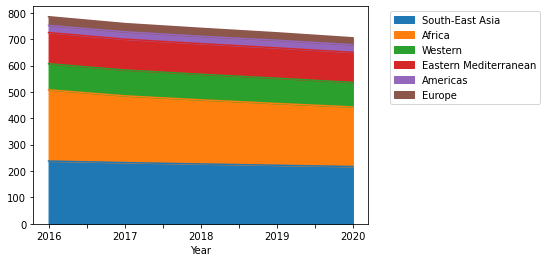

In [200]:
import matplotlib.pyplot as plot
ax = incidence_of_tb_in_regions.plot.area(stacked=True);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plot.show(block=True);

In [201]:
population = pd.DataFrame()
population['Year'] = ['2016','2017', '2018', '2019', '2020']
population['South-East Asia'] = [1930000, 1950000, 1970000, 1980000, 2000000]
population['Africa'] = [989000, 1020000, 1050000, 1060000, 1090000]
population['Western'] = [1860000, 1890000, 1900000, 1920000, 1930000]
population['Eastern Mediterranean'] = [648000, 669000, 682000, 704000, 717000]
population['Americas'] = [991000, 996000, 1010000, 1000000, 1010000]
population['Europe'] = [910000, 916000, 920000, 927000, 930000]
population = population.set_index('Year')
population 


,South-East Asia,Africa,Western,Eastern Mediterranean,Americas,Europe
Year,,,,,,
2016,1930000,989000,1860000,648000,991000,910000
2017,1950000,1020000,1890000,669000,996000,916000
2018,1970000,1050000,1900000,682000,1010000,920000
2019,1980000,1060000,1920000,704000,1000000,927000
2020,2000000,1090000,1930000,717000,1010000,930000


Text(0, 0.5, 'Population')

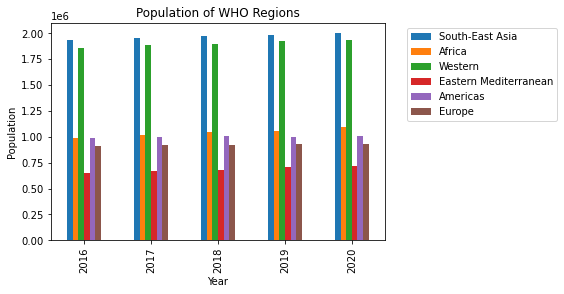

In [202]:
population.plot(kind="bar")
plt.title("Population of WHO Regions")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Year")
plt.ylabel("Population")

In [203]:
total_incidence_per_population = pd.DataFrame()
total_incidence_per_population['Year'] = ['2016','2017', '2018', '2019', '2020']
total_incidence_per_population['South-East Asia'] = [4740, 4670, 4440, 4370, 4340]
total_incidence_per_population['Africa'] = [2720, 2590, 2480, 2450, 2470]
total_incidence_per_population['Western'] = [1590, 1800, 1800, 1840, 1800]
total_incidence_per_population['Eastern Mediterranean'] = [749, 766, 771, 810, 819]
total_incidence_per_population['Americas'] = [268, 274, 282, 289, 290]
total_incidence_per_population['Europe'] = [323, 290, 273, 259, 246]
total_incidence_per_population = total_incidence_per_population.set_index('Year')
total_incidence_per_population 

,South-East Asia,Africa,Western,Eastern Mediterranean,Americas,Europe
Year,,,,,,
2016,4740,2720,1590,749,268,323
2017,4670,2590,1800,766,274,290
2018,4440,2480,1800,771,282,273
2019,4370,2450,1840,810,289,259
2020,4340,2470,1800,819,290,246


Text(0, 0.5, 'Number of incidences')

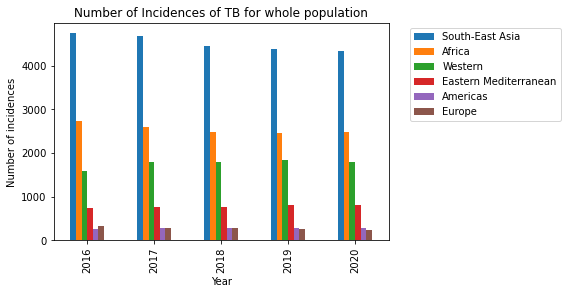

In [204]:
total_incidence_per_population.plot(kind="bar")
plt.title("Number of Incidences of TB for whole population")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Year")
plt.ylabel("Number of incidences")

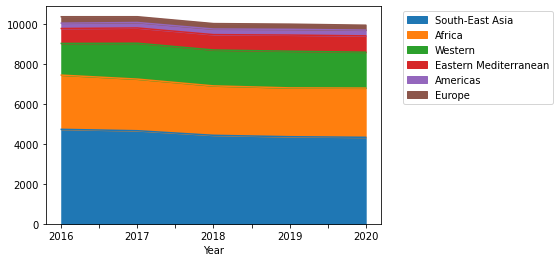

In [205]:
import matplotlib.pyplot as plot
ax = total_incidence_per_population.plot.area(stacked=True);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plot.show(block=True);

In [206]:
# Western Specific Rows
rows = (Australia, Brunei_Darussalam, Cambodia, China, Cook_Islands, Fiji, Japan, Kiribati, Lao,Malaysia,Marshall_Islands,Micronesia, Mongolia,Nauru,New_Zealand,Palau,Papua_New_Guinea,Philippines,Republic_of_Korea,Samoa,Singapore,Solomon_Islands,Tonga,Tuvalu,Vanuatu,Vietnam)
len(rows)

26

In [207]:
# Eastern mediterran Specific Rows
rows = (Afghanistan,Bahrain,Djibouti,Egypt,Iran,Iraq,Jordan,Kuwait,Lebanon,Libya,Morocco,Oman,Pakistan,Qatar,Saudi_Arabia,Somalia,Sudan,Syrian_Arab_Republic,Tunisia,United_Arab_Emirates,Yemen)
len(rows)

21

In [208]:
south_east_asia_region.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Bangladesh,BD,BGD,50,2019,inc,num,0-14,a,all,33000,22000.0,43000.0
1,Bangladesh,BD,BGD,50,2019,inc,num,0-14,f,all,16000,8700.0,23000.0
2,Bangladesh,BD,BGD,50,2019,inc,num,0-14,m,all,17000,9300.0,25000.0
3,Bangladesh,BD,BGD,50,2019,inc,num,0-4,f,all,5700,0.0,12000.0
4,Bangladesh,BD,BGD,50,2019,inc,num,0-4,m,all,6900,0.0,14000.0


In [209]:
south_east_asia_region.corr()

,iso_numeric,year,best,lo,hi
iso_numeric,1.000000,NaN,-0.020316,-0.012311,-0.024177
year,NaN,NaN,NaN,NaN,NaN
best,-0.020316,NaN,1.000000,0.969749,0.990346
lo,-0.012311,NaN,0.969749,1.000000,0.928036
hi,-0.024177,NaN,0.990346,0.928036,1.000000


In [210]:
# south_east_asia_region.loc[south_east_asia_region['country'] == 'Bangladesh']

In [211]:
# colnames = ['country', 'iso2', 'iso3', 'iso_numeric', 'year', 'measure', 'unit','age_group', 'sex','risk_factor','best', 'lo', 'hi']
# # rows = (Bangladesh, Bhutan , Democratic_people_Republic_of_Korea, India, Indonesia, Maldives, Myanmar, Nepal, Sri_Lanka, Thailand, Timor_Leste)
# south_east_asia_region_8 = pd.DataFrame(Bangladesh, columns = colnames)
# south_east_asia_region_8 = south_east_asia_region_8 .append(India)
# south_east_asia_region_8 = south_east_asia_region_8 .append(Indonesia)
# south_east_asia_region_8 = south_east_asia_region_8 .append(Myanmar)
# south_east_asia_region_8 = south_east_asia_region_8 .append(Nepal)
# south_east_asia_region_8 = south_east_asia_region_8 .append(Sri_Lanka)
# south_east_asia_region_8 = south_east_asia_region_8 .append(Thailand)
# south_east_asia_region_8 = south_east_asia_region_8 .append(Timor_Leste)
# south_east_asia_region_8 = south_east_asia_region_8 .reset_index(drop=True)
# south_east_asia_region_8

In [212]:
Bangladesh['best'].mean()

55673.88888888889

In [213]:
India['best'].mean()

413513.8888888889

In [214]:
Indonesia['best'].mean()

129475.0

In [215]:
Myanmar['best'].mean()

26926.666666666668

In [216]:
Nepal['best'].mean()

10491.666666666666

In [217]:
Sri_Lanka['best'].mean()

2093.527777777778

In [218]:
Thailand['best'].mean()

16760.555555555555

In [219]:
Timor_Leste['best'].mean()

1040.5833333333333

In [220]:
413513.8888888889 / 2000000000 # India

0.00020675694444444444

In [221]:
129475 / 2000000000 # Indonesia

6.47375e-05

In [222]:
55673 / 2000000000 # Bang

2.78365e-05

In [223]:
26926 / 2000000000 # Myanmar

1.3463e-05

In [224]:
countries = south_east_asia_region.pivot_table(index=["country"], aggfunc={'best':'mean'})
# countries['Percentage_of_Occupancy'] = (countries['best'] * 100000) / 2000000000
# countries['Percentage_of_Occupancy'].sum()
countries

,best
country,
Bangladesh,55673.888889
Bhutan,205.093750
Democratic People's Republic of Korea,22233.142857
India,413513.888889
Indonesia,129475.000000
Maldives,32.000000
Myanmar,26926.666667
Nepal,10491.666667
Sri Lanka,2093.527778


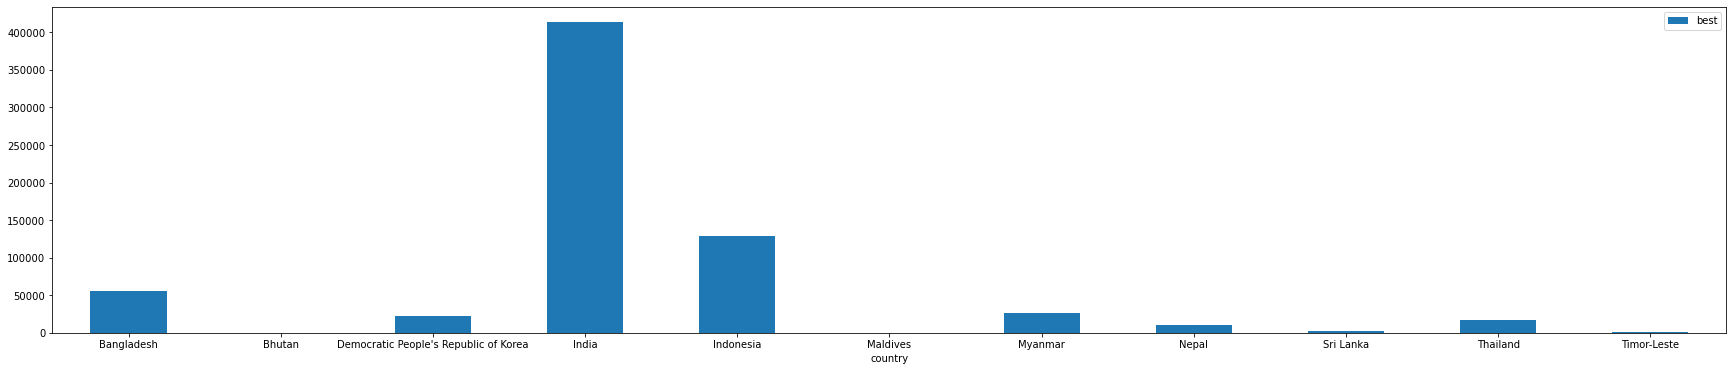

In [225]:
ax = countries.plot.bar(rot=0, figsize=(30, 6))

In [226]:
tb_2019 = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-2/Week_6_Module_2_Project/data/TB_burden_age_sex_2020-06-14_clean.csv')
tb_2019.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2018,inc,num,0-14,a,all,14000,7400.0,21000.0
1,Afghanistan,AF,AFG,4,2018,inc,num,0-14,f,all,6800,2200.0,11000.0
2,Afghanistan,AF,AFG,4,2018,inc,num,0-14,m,all,7300,2400.0,12000.0
3,Afghanistan,AF,AFG,4,2018,inc,num,0-4,f,all,2700,0.0,6700.0
4,Afghanistan,AF,AFG,4,2018,inc,num,0-4,m,all,3200,0.0,8100.0


In [227]:
import sqlite3
from pandas import DataFrame

conn = sqlite3.connect('TestDB2.db')
c = conn.cursor()

# c.execute('CREATE TABLE tb_2019_data (country text, iso2 text, iso3 text, iso_numeric number, year number, measure text, unit text, age_group text, sex text, risk_factor text, best number, lo number, hi number)')
# conn.commit()

tb_2019.to_sql('tb_2019_data', conn, if_exists='replace', index = False)
 
c.execute('''  
SELECT * FROM tb_2019_data
          ''')

df_2019 = DataFrame(c.fetchall(), columns=['country','iso2', 'iso3', 'iso_numeric', 'year', 'measure', 'unit', 'age_group', 'sex', 'risk_factor', 'best', 'lo', 'hi'])    
df_2019.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2018,inc,num,0-14,a,all,14000,7400.0,21000.0
1,Afghanistan,AF,AFG,4,2018,inc,num,0-14,f,all,6800,2200.0,11000.0
2,Afghanistan,AF,AFG,4,2018,inc,num,0-14,m,all,7300,2400.0,12000.0
3,Afghanistan,AF,AFG,4,2018,inc,num,0-4,f,all,2700,0.0,6700.0
4,Afghanistan,AF,AFG,4,2018,inc,num,0-4,m,all,3200,0.0,8100.0


In [228]:
total_countries = df_2019.pivot_table(index=["country"], columns = ['age_group'], aggfunc={'country':'count'})
total_countries

country                                          \
age_group                    0-14 0-4 15-24 15plus 25-34 35-44 45-54 5-14   
country                                                                     
Afghanistan                     3   2     2      9     2     2     2    2   
Albania                         3   2     2     12     2     2     2    2   
Algeria                         3   2     2     11     2     2     2    2   
American Samoa                  3   2     2      3     2     2     2    2   
Andorra                         3   2     2      9     2     2     2    2   
...                           ...  ..   ...    ...   ...   ...   ...  ...   
Wallis and Futuna Islands       3   2     2      3     2     2     2    2   
West Bank and Gaza Strip        3   2     2      3     2     2     2    2   
Yemen                           3   2     2     12     2     2     2    2   
Zambia                          3   2     2     12     2     2     2    2   
Zimbabwe                        3   2     2     12     2     2     2    2   

                                            
age_group                 55-64 65plus all  
country                                     
Afghanistan                   2      2   5  
Albania                       2      2   5  
Algeria                       2      2   5  
American Samoa                2      2   3  
Andorra                       2      2   3  
...                         ...    ...  ..  
Wallis and Futuna Islands     2      2   3  
West Bank and Gaza Strip      2      2   3  
Yemen                         2      2   5  
Zambia                        2      2   5  
Zimbabwe                      2      2   5  

[214 rows x 11 columns]

In [229]:
total_countries.isnull().values.any()

False

In [230]:
Bangladesh = df_2019.loc[df_2019['country'] == 'Bangladesh']

In [231]:
Bhutan = df_2019.loc[df_2019['country'] == 'Bhutan']

In [232]:
Democratic_people_Republic_of_Korea = df_2019.loc[df_2019['country'] == "Democratic People's Republic of Korea"]

In [233]:
India = df_2019.loc[df_2019['country'] == 'India']

In [234]:
Indonesia = df_2019.loc[df_2019['country'] == 'Indonesia']

In [235]:
Maldives = df_2019.loc[df_2019['country'] == 'Maldives']

In [236]:
Myanmar = df_2019.loc[df_2019['country'] == 'Myanmar']

In [237]:
Nepal = df_2019.loc[df_2019['country'] == 'Nepal']

In [238]:
Sri_Lanka = df_2019.loc[df_2019['country'] == 'Sri Lanka']

In [239]:
Thailand = df_2019.loc[df_2019['country'] == 'Thailand']

In [240]:
Timor_Leste = df_2019.loc[df_2019['country'] == 'Timor-Leste']

In [241]:
colnames = ['country', 'iso2', 'iso3', 'iso_numeric', 'year', 'measure', 'unit','age_group', 'sex','risk_factor','best', 'lo', 'hi']
# rows = (Bangladesh, Bhutan , Democratic_people_Republic_of_Korea, India, Indonesia, Maldives, Myanmar, Nepal, Sri_Lanka, Thailand, Timor_Leste)
south_east_asia_region_2019 = pd.DataFrame(Bangladesh, columns = colnames)
south_east_asia_region_2019 = south_east_asia_region_2019.append(Bhutan)
south_east_asia_region_2019 = south_east_asia_region_2019.append(Democratic_people_Republic_of_Korea)
south_east_asia_region_2019 = south_east_asia_region_2019.append(India)
south_east_asia_region_2019 = south_east_asia_region_2019.append(Indonesia)
south_east_asia_region_2019 = south_east_asia_region_2019.append(Maldives)
south_east_asia_region_2019 = south_east_asia_region_2019.append(Myanmar)
south_east_asia_region_2019 = south_east_asia_region_2019.append(Nepal)
south_east_asia_region_2019 = south_east_asia_region_2019.append(Sri_Lanka)
south_east_asia_region_2019 = south_east_asia_region_2019.append(Thailand)
south_east_asia_region_2019 = south_east_asia_region_2019.append(Timor_Leste)
south_east_asia_region_2019 = south_east_asia_region_2019.reset_index(drop=True)
south_east_asia_region_2019

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Bangladesh,BD,BGD,50,2018,inc,num,0-14,a,all,32000,22000.0,42000.0
1,Bangladesh,BD,BGD,50,2018,inc,num,0-14,f,all,15000,8500.0,22000.0
2,Bangladesh,BD,BGD,50,2018,inc,num,0-14,m,all,16000,9000.0,24000.0
3,Bangladesh,BD,BGD,50,2018,inc,num,0-4,f,all,5800,0.0,12000.0
4,Bangladesh,BD,BGD,50,2018,inc,num,0-4,m,all,6900,0.0,14000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,Timor-Leste,TL,TLS,626,2018,inc,num,all,a,all,6300,3800.0,8800.0
385,Timor-Leste,TL,TLS,626,2018,inc,num,all,a,hiv,76,29.0,150.0
386,Timor-Leste,TL,TLS,626,2018,inc,num,all,a,und,2400,1500.0,3400.0
387,Timor-Leste,TL,TLS,626,2018,inc,num,all,f,all,2300,1100.0,3500.0


In [242]:
# colnames = ['country', 'iso2', 'iso3', 'iso_numeric', 'year', 'measure', 'unit','age_group', 'sex','risk_factor','best', 'lo', 'hi']
# # rows = (Bangladesh, Bhutan , Democratic_people_Republic_of_Korea, India, Indonesia, Maldives, Myanmar, Nepal, Sri_Lanka, Thailand, Timor_Leste)
# south_east_asia_region_2019_9 = pd.DataFrame(Bangladesh, columns = colnames)
# south_east_asia_region_2019_9 = south_east_asia_region_2019_9.append(India)
# south_east_asia_region_2019_9 = south_east_asia_region_2019_9.append(Indonesia)
# # south_east_asia_region_2019_9 = south_east_asia_region_2019_9.append(Maldives)
# south_east_asia_region_2019_9 = south_east_asia_region_2019_9.append(Myanmar)
# south_east_asia_region_2019_9 = south_east_asia_region_2019_9.append(Nepal)
# south_east_asia_region_2019_9 = south_east_asia_region_2019_9.append(Sri_Lanka)
# south_east_asia_region_2019_9 = south_east_asia_region_2019_9.append(Thailand)
# south_east_asia_region_2019_9 = south_east_asia_region_2019_9.append(Timor_Leste)
# south_east_asia_region_2019_9 = south_east_asia_region_2019_9.reset_index(drop=True)
# south_east_asia_region_2019_9

In [243]:
countries_2019 = south_east_asia_region_2019.pivot_table(index=["country"], aggfunc={'best':'mean'})
# countries['Percentage_of_Occupancy'] = (countries['best'] * 100000) / 2000000000
# countries['Percentage_of_Occupancy'].sum()
countries_2019

,best
country,
Bangladesh,55390.277778
Bhutan,181.406250
Democratic People's Republic of Korea,22656.969697
India,423936.111111
Indonesia,132213.888889
Maldives,27.722222
Myanmar,28124.444444
Nepal,6616.666667
Sri Lanka,2123.833333


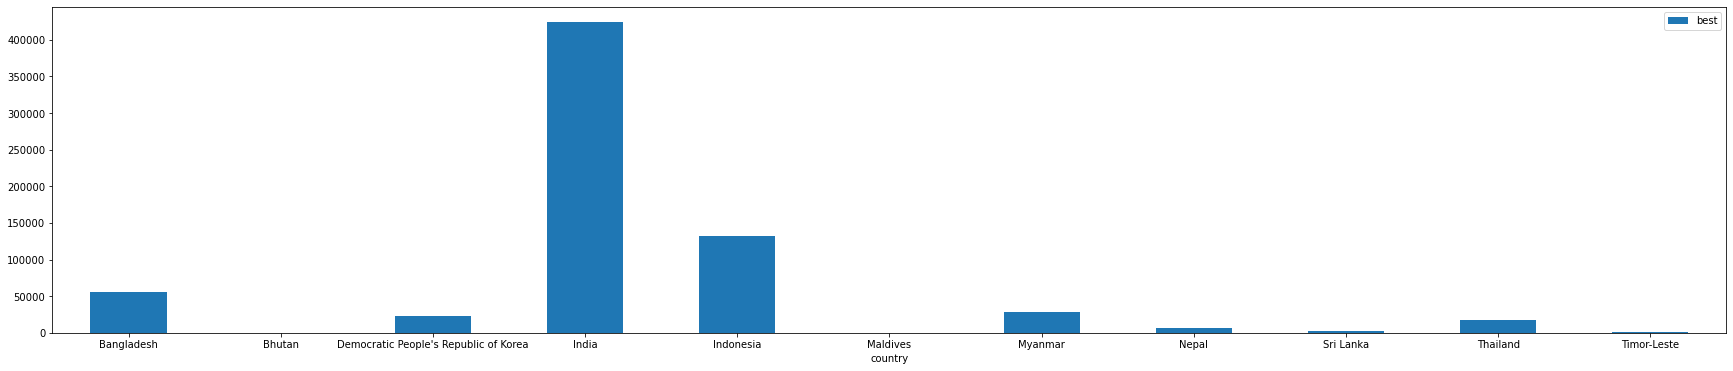

In [244]:
ax = countries_2019.plot.bar(rot=0, figsize=(30, 6))

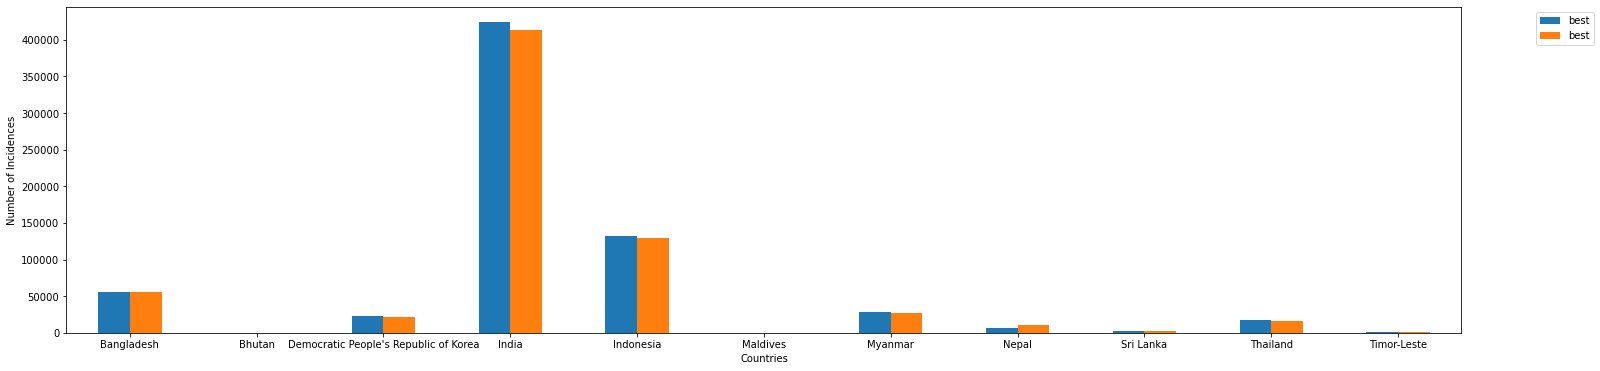

In [249]:
combined_plot = pd.concat([countries_2019, countries], axis=1)
# plot the DataFrame
combined_plot.plot.bar(figsize=(25, 6))
plt.xticks(rotation=0)
plt.xlabel('Countries')
plt.ylabel('Number of Incidences')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()